**Author:** C Mitchell

This notebook is to visualize and summarize the PIC blank values. 

In [1]:
import pandas as pd
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/03-PIC-blank-corrected.csv')
df = df.assign(label= df.Code.str[:-1])

In [3]:
df

,Code,Tube Number,Culture,Name,Ploidity,CaCo3,Filter,Rinse,Comment on filtration,Ca (ug/L),...,Ca sw corr,Ca sw + V corr,PIC mmol/m3,PIC ug/l,PIC blank mean mmol/m3,PIC blank mean ug/l,PIC blank stdev mmol/m3,PIC blank stdev ug/l,PIC blank %,label
0,LAX1,41.0,RCC1151,Calcidiscus leptoporus,n,Yes,0.8,NH4OH,NaN,162.37,...,135.495035,45.165012,0.886425,10.637097,0.242701,2.912406,0.027595,0.331146,27.379710,LAX
1,LAX2,42.0,RCC1151,Calcidiscus leptoporus,n,Yes,0.8,NH4OH,NaN,211.71,...,91.863897,30.621299,0.522832,6.273983,0.242701,2.912406,0.027595,0.331146,46.420372,LAX
2,LAX3,43.0,RCC1151,Calcidiscus leptoporus,n,Yes,0.8,NH4OH,NaN,153.66,...,66.504478,22.168159,0.311503,3.738041,0.242701,2.912406,0.027595,0.331146,77.912629,LAX
3,CAX1,53.0,RCC1164,Calcidiscus leptoporus,2n,Yes,0.8,NH4OH,NaN,625.42,...,534.745988,178.248663,4.213516,50.562192,0.242701,2.912406,0.027595,0.331146,5.760048,CAX
4,CAX2,54.0,RCC1164,Calcidiscus leptoporus,2n,Yes,0.8,NH4OH,NaN,1144.30,...,1060.109992,353.369997,8.591549,103.098593,0.242701,2.912406,0.027595,0.331146,2.824875,CAX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,UBY2,87.0,RCC1472,Umbilicosphaera foliosa,2n,Yes,0.4,K2B4O7,NaN,164.39,...,144.950983,48.316994,1.089406,13.072876,0.118519,1.422223,0.017094,0.205133,10.879187,UBY
61,UBY3,88.0,RCC1472,Umbilicosphaera foliosa,2n,Yes,0.4,K2B4O7,NaN,137.36,...,130.145701,43.381900,0.966029,11.592347,0.118519,1.422223,0.017094,0.205133,12.268634,UBY
62,SBY1,38.0,MIR 02,Syracosphaera pulchra,n,Yes,0.4,K2B4O7,NaN,184.81,...,121.844133,40.614711,0.896849,10.762191,0.118519,1.422223,0.017094,0.205133,13.214992,SBY
63,SBY2,39.0,MIR 02,Syracosphaera pulchra,n,Yes,0.4,K2B4O7,NaN,220.67,...,170.372222,56.790741,1.301250,15.615000,0.118519,1.422223,0.017094,0.205133,9.108054,SBY


Making a boxplot for each treatment:

In [4]:
df = df.assign(protocol= df.label.str[1:])

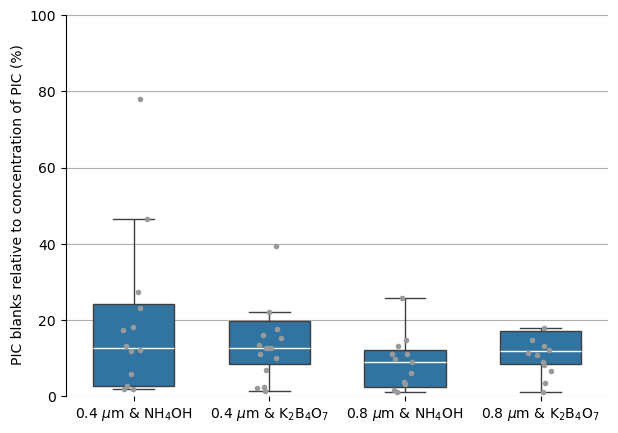

In [5]:
f, ax = plt.subplots(figsize=(7,5))

sns.boxplot(
    df, y="PIC blank %", x="protocol", 
    width=.6, showfliers=False, patch_artist=True, 
           medianprops={"color": "white", "linewidth": 1}
)

# Add in points to show each observation
sns.stripplot(df, y="PIC blank %", x="protocol", size=4,color=[0.6,0.6,0.6])

# Tweak the visual presentation
ax.set_ylim([0,101])
ax.yaxis.grid(True)
ax.set(xlabel="")
ax.set(ylabel="PIC blanks relative to concentration of PIC (%)")
sns.despine(trim=True, bottom = True)
ax.set_xticks([0,1,2,3]);
ax.set_xticklabels([r'0.4 $\mu$m & NH$_4$OH', r'0.4 $\mu$m & K$_2$B$_4$O$_7$', r'0.8 $\mu$m & NH$_4$OH', r'0.8 $\mu$m & K$_2$B$_4$O$_7$']);

plt.savefig('figures/Fig1-visualizing-blanks.png',dpi=350, bbox_inches='tight')

In [6]:
medians = {}
for key in df['protocol']:
    subdf = df[df.protocol.str.contains(key)]
    medians[key] = subdf['PIC blank %'].median()

In [7]:
medians

{'AX': 12.56717031601627,
 'AY': 12.701395425076786,
 'BX': 8.906514174969878,
 'BY': 11.79672676060699}